<a href="https://colab.research.google.com/github/2303a51295madhuri/ADM-2005/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Generate a synthetic dataset
np.random.seed(0)
data = np.random.normal(0, 1, 100)
data = np.append(data, [5, 6, 7])  # Add some outliers
df = pd.DataFrame(data, columns=['Values'])

In [ ]:
# Method 1: Z-Score Method
from scipy import stats
z_scores = stats.zscore(df['Values'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_zscore = df[filtered_entries]


In [ ]:
# Method 2: IQR Method
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr = df[(df['Values'] > lower_bound) & (df['Values'] < upper_bound)]


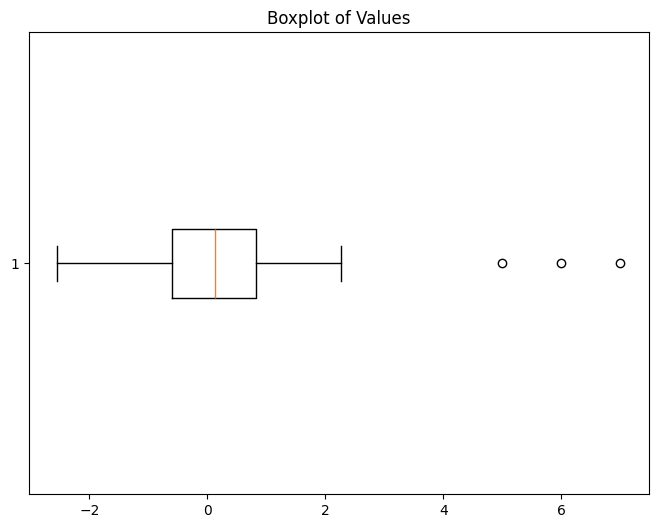

In [ ]:
# Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Values'], vert=False)
plt.title('Boxplot of Values')
plt.show()

In [ ]:
# Handle outliers (capping, removal, or imputation)
# Capping
df_capped = df.copy()
df_capped['Values'] = np.clip(df_capped['Values'], lower_bound, upper_bound)


In [ ]:

# Removal
df_removed = df.copy()
df_removed = df_removed[(df_removed['Values'] >= lower_bound) & (df_removed['Values'] <= upper_bound)]




In [ ]:

# Imputation
df_imputed = df.copy()
median_value = df['Values'].median()
df_imputed['Values'] = np.where((df_imputed['Values'] < lower_bound) | (df_imputed['Values'] > upper_bound), median_value, df_imputed['Values'])


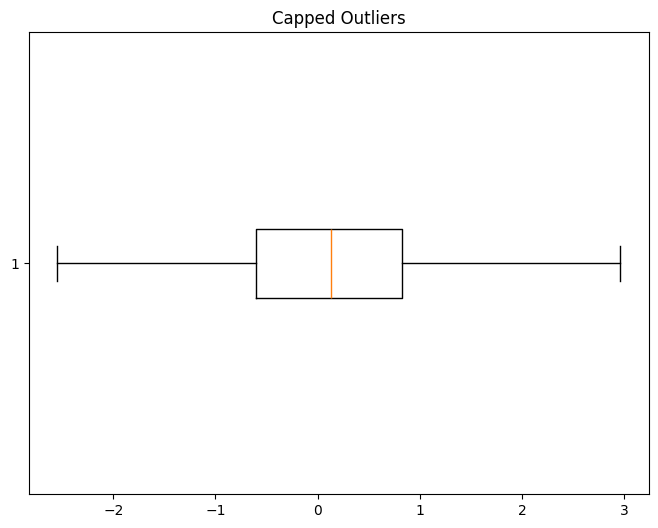

In [ ]:
# Visualize handled data
plt.figure(figsize=(8, 6))
plt.boxplot(df_capped['Values'], vert=False)
plt.title("Capped Outliers")
plt.show()


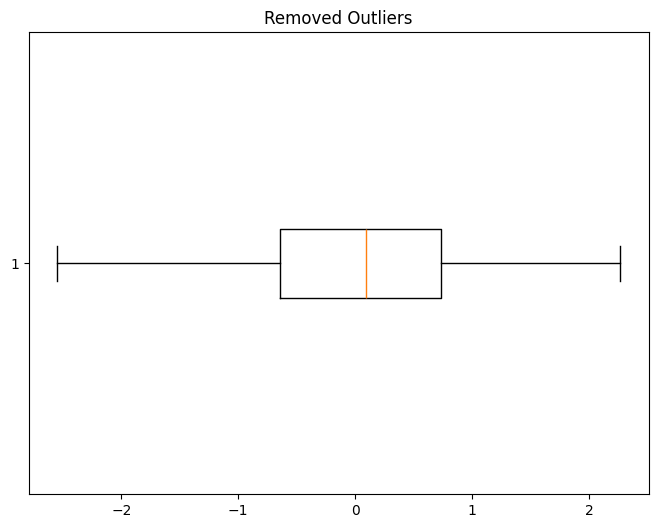

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_removed['Values'], vert=False)
plt.title("Removed Outliers")
plt.show()

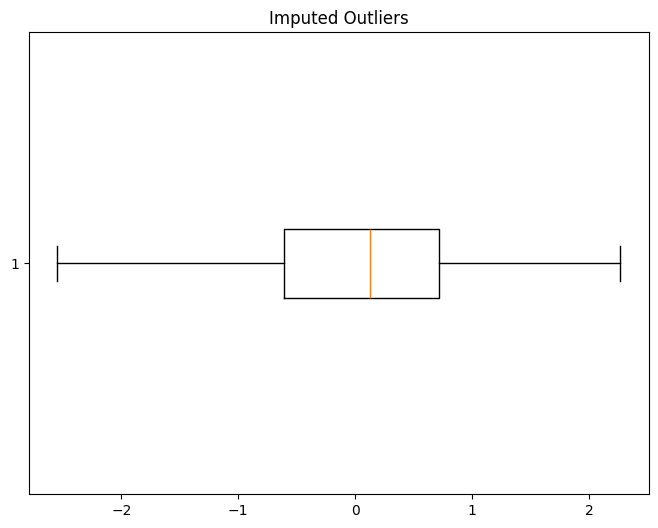

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_imputed['Values'], vert=False)
plt.title("Imputed Outliers")
plt.show()


In [ ]:
# Print outliers detected
# Calculate outliers using IQR
outliers_iqr = df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]['Values']

# Calculate outliers using Z-Score
outliers_zscore = df[(abs_z_scores >= 3)]['Values']

print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")

Outliers detected using IQR:
100    5.0
101    6.0
102    7.0
Name: Values, dtype: float64
Outliers detected using Z-Score:
100    5.0
101    6.0
102    7.0
Name: Values, dtype: float64
